In [19]:
import geopandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [20]:
request = requests.get('https://r2.datahub.io/clvyjaryy0000la0cxieg4o8o/main/raw/data/countries.geojson')

In [21]:
gdf = geopandas.read_file(request.content)

In [22]:
gdf['name'] = gdf['name'].replace({'eSwatini': 'Eswatini'})

In [23]:
pib = pd.read_csv('pib_percapita_ppc.csv')

In [24]:
pib = pib.iloc[:, [0, 68]]

In [25]:
egov = pd.read_csv('EGOV_DATA_2024.csv')

In [26]:
paises = egov['Country Name'].unique()

In [27]:
set(paises).difference(set(pib['Country Name']))

{'Bahamas',
 'Congo',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Egypt',
 'Gambia',
 'Georgia (Country)',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Yemen'}

In [28]:
pib['Country Name'] = pib['Country Name'].replace({
    'Bahamas, The': 'Bahamas',
    'Congo, Rep.': 'Congo',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Slovak Republic': 'Slovakia',
    'Yemen, Rep.': 'Yemen',
    'Venezuela, RB': 'Venezuela',
    'Turkiye': 'Türkiye',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Georgia': 'Georgia (Country)',
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    'Korea, Rep.': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
    "Iran, Islamic Rep.": 'Iran (Islamic Republic of)',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    "Lao PDR": "Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": 'Kyrgyzstan'
})

In [29]:
set(paises).difference(set(pib['Country Name']))

set()

In [30]:
set(paises).difference(set(gdf['name']))

{'Bahamas',
 'Brunei Darussalam',
 'Congo',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Georgia (Country)',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Sao Tome and Principe',
 'Serbia',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'Viet Nam'}

In [31]:
gdf['name'] = gdf['name'].replace({
    'Brunei': 'Brunei Darussalam',
    'Vietnam': 'Viet Nam',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Syria': 'Syrian Arab Republic',
    'Republic of the Congo': 'Congo',
    'The Bahamas': 'Bahamas',
    'Georgia': 'Georgia (Country)', 
    'Russia': 'Russian Federation',
    'North Korea': "Democratic People's Republic of Korea",
    'South Korea': 'Republic of Korea', 
    'Moldova': 'Republic of Moldova',
    'Turkey': 'Türkiye',
    'East Timor': 'Timor-Leste',
    'Republic of Serbia': 'Serbia',
    'Czechia': 'Czech Republic',
    'Ivory Coast': "Côte d'Ivoire",
    'Iran': 'Iran (Islamic Republic of)',
    "Federated States of Micronesia": "Micronesia (Federated States of)",
    'Laos': "Lao People's Democratic Republic",
    "São Tomé and Principe": "Sao Tome and Principe"
})

In [32]:
set(paises).difference(set(gdf['name']))

set()

In [33]:
gdf = gdf[gdf['name'].isin(paises)].sort_values(by='name', ascending=True).reset_index(drop=True)

In [34]:
pib = pib[pib['Country Name'].isin(paises)].sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [35]:
gdf['PIB'] = pib['2024']

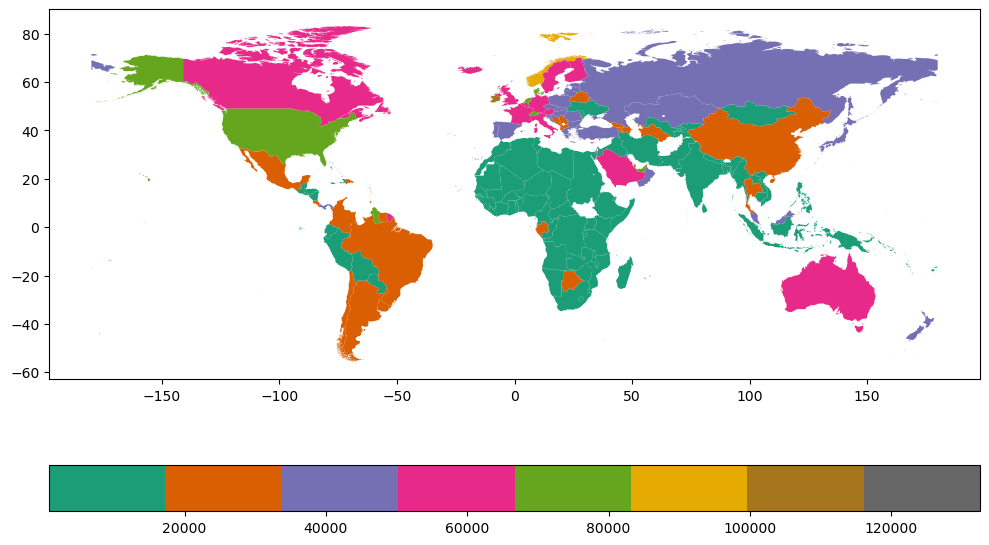

In [36]:
gdf.plot(column='PIB',
        cmap='Dark2',
        legend=True,
        legend_kwds={
            'orientation': "horizontal"
        },
        figsize=(10, 6)
)

plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/mapa_coropleto_paises_pib_percapita_ppc.png', dpi=300, bbox_inches='tight')
plt.show()